## Get Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_frames = pd.read_html(
    io='https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average',
    index_col=0)
df = pd.DataFrame({'Symbol': data_frames[1]['Symbol'],
             'Industry': data_frames[1]['Industry']})
DJ_tickers = list(df['Symbol'])

In [3]:
import yfinance as yf
DJdata = yf.download(DJ_tickers, start="2012-12-01", end="2022-12-01")

[*********************100%***********************]  30 of 30 completed


In [4]:
DJdata = DJdata.reset_index().dropna(axis = 1)
DJdata.head()

Date  Adj Close                                              \
                   AAPL       AMGN        AXP         BA        CAT   
0 2012-12-03  18.004154  68.242210  48.335842  62.027992  63.669312   
1 2012-12-04  17.686563  68.188210  48.206333  62.053127  63.420662   
2 2012-12-05  16.548313  68.713142  48.689785  61.902302  64.844917   
3 2012-12-06  16.807846  68.350311  48.448051  61.994457  64.769562   
4 2012-12-07  16.378160  68.180466  48.871067  62.547523  65.553268   

                                               ...    Volume            \
         CRM       CSCO        CVX        DIS  ...       MRK      MSFT   
0  39.262501  13.922759  69.210670  44.131493  ...  12177865  53173800   
1  39.235001  14.025187  68.747772  44.140438  ...  10476751  49777500   
2  39.217499  14.054451  69.547928  44.400101  ...  12206056  68283800   
3  39.352501  14.251987  70.394394  44.600105  ...   9240216  39182300   
4  39.174999  14.149565  70.751472  44.763737  ...   8247236  46162100   

                                                                                
       NKE        PG      TRV      UNH         V        VZ       WBA       WMT  
0  8688000   7404600  1807900  3861300  11736800  11458400   6427900   9086800  
1  7028400   6634900  1808400  5948900   9100800  12945800   7172000  12820500  
2  6764400   7623400  5874000  4495100  11971200  15334900  11230700   9513200  
3  9092000  10686900  2500600  3771900   9124000  15506000   6952000   7166100  
4  7418000  11590900  2303600  4206200   7557200  11139400   6025000   7283000  

[5 rows x 175 columns]

In [5]:
data_frames = pd.read_html(
    io='https://en.wikipedia.org/wiki/EURO_STOXX_50#Composition',
    index_col=0)
ES_tickers = pd.DataFrame({'Symbol': data_frames[3].index})

In [6]:
ESdata = yf.download(list(ES_tickers['Symbol']), start="2012-12-01", end="2022-12-01")


[*********************100%***********************]  50 of 50 completed


In [7]:
ESdata = ESdata.reset_index().dropna(axis=1,subset=np.arange(7), thresh=3)
ESdata.head()

Date  Adj Close                                                        \
                 ABI.BR     AD.AS     ADS.DE      AI.PA     AIR.PA     ALV.DE   
0 2012-12-03  49.791088  6.961987  56.710117  49.850109  22.364405  63.046535   
1 2012-12-04  49.476658  7.026826  56.609032  49.770763  22.474344  63.109447   
2 2012-12-05  48.862392  7.093090  56.305763  49.474583  23.028275  63.612808   
3 2012-12-06  49.140266  7.178592  56.701694  50.040516  24.863430  64.619545   
4 2012-12-07  49.425449  7.232032  56.988106  50.051094  25.197481  64.682472   

                                    ...   Volume                        \
     ASML.AS     BAS.DE    BAYN.DE  ...   RMS.PA    SAF.PA      SAN.MC   
0  43.686462  41.658916  49.875309  ...  30357.0  535515.0  50255268.0   
1  42.577671  41.347095  50.010483  ...  16586.0  555817.0  54310777.0   
2  42.835632  41.556980  49.903767  ...  28149.0  358542.0  67708585.0   
3  43.401344  42.174633  51.603977  ...  18563.0  661594.0  49105868.0   
4  44.215965  41.982738  51.148685  ...  23106.0  722990.0  45621561.0   

                                                                                
      SAN.PA     SAP.DE     SIE.DE     STLA.MI      SU.PA     TTE.PA    VOW.DE  
0  2137537.0  2141503.0  1839783.0  25227632.0  1137798.0  4184773.0   87203.0  
1  1454423.0  1826890.0  1561833.0  17953874.0   881521.0  3399852.0   64091.0  
2  2038512.0  2735773.0  1897947.0  17792817.0  1538257.0  4036178.0   88992.0  
3  2676636.0  3338318.0  3189384.0  26505293.0  1582235.0  4898770.0  119016.0  
4  2197382.0  2966156.0  1988649.0  22369683.0  1330979.0  4963217.0   78854.0  

[5 rows x 283 columns]

In [8]:
data_frames = pd.read_html(
    io='https://en.wikipedia.org/wiki/Hang_Seng_Index',
    index_col=0)
HS_tickers = pd.DataFrame({'Symbol': data_frames[6].index})

In [9]:
import re
HS_symbol = []
for i in range(len(HS_tickers)):
    HS_symbol.append(re.split(r'[：|\s+]', HS_tickers['Symbol'][i])[1].zfill(4)+'.HK')

In [10]:
HSdata = yf.download(HS_symbol, start="2012-12-01", end="2022-12-01")


[*********************100%***********************]  73 of 73 completed


In [11]:
HSdata = HSdata.reset_index().dropna(axis=1,subset=np.arange(7), thresh=3)
HSdata.head()

Date  Adj Close                                                        \
                0001.HK    0002.HK   0003.HK    0005.HK    0006.HK    0011.HK   
0 2012-12-03  52.532536  44.211933  7.729591  48.347389  33.960495  78.955696   
1 2012-12-04  52.757614  44.014565  7.711273  48.625416  33.563004  78.352966   
2 2012-12-05  53.342823  44.540894  7.857806  49.428638  33.786594  79.558395   
3 2012-12-06  53.387829  44.376411  7.839487  49.181492  33.786594  79.692329   
4 2012-12-07  53.342823  44.080360  7.711273  48.965237  33.339413  79.022659   

                                    ...  Volume                                \
     0012.HK    0016.HK    0017.HK  ... 2313.HK    2318.HK   2319.HK  2331.HK   
0  18.752647  72.233559  27.264793  ...  381583   16595488   9026620  2344394   
1  18.597666  72.490402  26.953957  ...  395796   32180190   8058000   710074   
2  19.010948  73.196678  27.398012  ...  215005  603273466  27412296  2389903   
3  19.217588  73.389290  27.531227  ...  458004   35203708  16868842  1845414   
4  19.148710  73.453522  27.575634  ...  997104   35492904  11863760  2809557   

                                                              
   2382.HK   2388.HK   2628.HK  2688.HK   3968.HK    3988.HK  
0  2149540  12096483  16246617  1261903  14541087  257043672  
1   925000   8425776  18382701   384000  22606047  267614888  
2  3321000   9623660  52239010  2652000  40586199  483662457  
3  5865300   8926594  24430040  1710400  39305621  272872791  
4  2285933  10574707  25470082  2484904  36653088  403066610  

[5 rows x 343 columns]

## Sliding Window 

In [12]:
AllData = pd.merge(DJdata, ESdata,how = 'outer', left_on ='Date',right_on = 'Date')
AllData = AllData.merge(HSdata,how = 'outer', left_on ='Date',right_on = 'Date')
AllData = AllData.sort_values('Date')
AllData = AllData.reset_index().drop('index',axis = 1)
AllData = AllData.drop(['Date'],axis = 1)

C:\Users\85409\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [30]:
AllData9 = pd.merge(DJdata[['Date','Close']].iloc[:,:4], ESdata[['Date','Close']].iloc[:,:4],how = 'outer', left_on ='Date',right_on = 'Date')
AllData9 = AllData9.merge(HSdata[['Date','Close']].iloc[:,:4],how = 'outer', left_on ='Date',right_on = 'Date')
AllData9 = AllData9.sort_values('Date')
AllData9 = AllData9.reset_index().drop('index',axis = 1)
AllData9 = AllData9.drop(['Date'],axis = 1)

C:\Users\85409\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [19]:
AllDatawindow = []
window_size = 100
for i in range(len(AllData) - window_size + 1):
    AllDatawindow.append(AllData[['Close']][i: i + window_size])
AllDatawindow = np.array(AllDatawindow)

In [32]:
AllDatawindow9 = []
window_size = 100
for i in range(len(AllData9) - window_size + 1):
    AllDatawindow9.append(AllData9[['Close']][i: i + window_size])
AllDatawindow9 = np.array(AllDatawindow9)

In [33]:
AllDatawindow_train,AllDatawindow_test = np.split(AllDatawindow,[1600])
AllDatawindow_train9,AllDatawindow_test9 = np.split(AllDatawindow9,[1600])


In [35]:
np.save('train_data_ms.npy', AllDatawindow_train)
np.save('test_data_ms.npy', AllDatawindow_test)
np.save('train_data_ms9.npy', AllDatawindow_train)
np.save('test_data_ms9.npy', AllDatawindow_test)

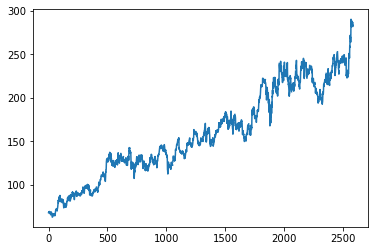

In [36]:
plt.plot(AllData.iloc[:,1])

## Get Time Mask

In [18]:
# all_ind=pd.concat(AllData[['Close']].loc[:i,:].notna().sum().to_frame().transpose() for i in range(len(AllData[['Close']])))
# diff_ind=all_ind - all_ind.shift(1)
# AllData = AllData.reset_index()
# AllData = AllData.dropna()
# AllData['diff_idx']=AllData['index'] - AllData['index'].shift(1)
# diff_ind = diff_ind.reset_index().drop('index',axis = 1).reset_index()
# diff_ind = diff_ind.merge(AllData[['index','diff_idx']],how ='inner',left_on = 'index',right_on = 'index')

In [19]:
# mask = pd.concat(diff_ind['diff_idx']-diff_ind.iloc[:,i].to_frame().transpose() for i in range(1,diff_ind.shape[1]-1)).transpose()
# mask = mask.dropna()
# AllData = AllData.dropna().drop(['index','Date','diff_idx'],axis = 1)

In [14]:
# maskDJ=pd.concat([mask.iloc[:,:29]]*6,axis = 1)
# maskEU=pd.concat([mask.iloc[:,29:76]]*6,axis = 1)
# maskHK=pd.concat([mask.iloc[:,76:]]*6,axis = 1)
# Allmask=pd.concat([maskDJ,maskEU,maskHK],axis = 1)

In [37]:
# AllData_part = pd.concat([AllData[['Close']].iloc[:,0:3],AllData[['Close']].iloc[:,29:32],AllData[['Close']].iloc[:,76:79]],axis = 1)
# Allmask_part =  pd.concat([mask.iloc[:,0:3],mask.iloc[:,29:32],mask.iloc[:,76:79]],axis = 1)
# Allmask_part

In [21]:
# AllDatawindow = []
# window_size = 100
# for i in range(len(AllData) - window_size + 1):
#     AllDatawindow.append(AllData[['Close']][i: i + window_size])
# AllDatawindow = np.array(AllDatawindow)

In [24]:
# Maskwindow = []
# window_size = 100
# for i in range(len(mask) - window_size + 1):
#     Maskwindow.append(mask[i: i + window_size])
# Maskwindow = np.array(Maskwindow)

In [27]:
# np.save('finance_mask_Close.npy', Maskwindow)

In [28]:
# np.save('finance_data_Close.npy', AllDatawindow)

In [3]:
# import numpy as np
# AllDatawindow = np.load('finance_data_Close.npy')
# Maskwindow = np.load('finance_mask_Close.npy')

In [29]:
# p = np.random.permutation(len(AllDatawindow))
# AllDatawindow=AllDatawindow[p]
# Maskwindow = Maskwindow[p]

In [38]:
# Maskwindow_train_pos[0]

In [30]:
# AllDatawindow_train,AllDatawindow_test = np.split(AllDatawindow,[1600])
# Maskwindow_train,Maskwindow_test = np.split(Maskwindow,[1600])

In [31]:
# Maskwindow_train_pos=np.zeros(Maskwindow_train.shape)
# Maskwindow_test_pos=np.zeros(Maskwindow_test.shape)
# for i in range(100):
#     Maskwindow_train_pos[:,i,:] = (Maskwindow_train[:,:i,:].sum(axis = 1)+i)/100
#     Maskwindow_test_pos[:,i,:] = (Maskwindow_test[:,:i,:].sum(axis = 1)+i)/100    

In [32]:
# np.save('train_data_Close.npy', AllDatawindow_train)
# np.save('test_data_Close.npy', AllDatawindow_test)
# np.save('train_mask_Close.npy', Maskwindow_train_pos)
# np.save('test_mask_Close.npy', Maskwindow_test_pos)